In [2]:
import ROOT as r
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Yield Ratios for all fills of Block 5 (seperated into two lists) 
# Format: (fill number, yield ratio, yield ratio error, N_jpsik, N_dpik)

yield_ratio_B5_A = [
    (10059, 0.760, 0.028, 96781, 345377),
    (10061, 0.721, 0.020, 296296, 1046683),
    (10066, 0.720, 0.014, 332860, 1176072),
    (10069, 0.715, 0.009, 749592, 2559563),
    (10070, 0.720, 0.040, 107704, 374275),
    (10072, 0.712, 0.009, 725045, 2447442),
    (10073, 0.728, 0.009, 762431, 2625926),
    (10074, 0.734, 0.009, 729868, 2495376),
    (10075, 0.730, 0.040, 192945, 657262),
    (10077, 0.711, 0.010, 542843, 1842546),
    (10082, 0.729, 0.021, 141384, 490304),
    (10084, 0.720, 0.013, 1350886, 4516259),
    (10086, 0.746, 0.017, 213769, 749797),
    (10087, 0.712, 0.009, 734131, 2529237),
]

yield_ratio_B5_B = [
    (10090, 0.687, 0.009, 688541, 2403979),
    (10091, 0.707, 0.015, 332322, 1181832),
    (10092, 0.705, 0.008, 850728, 2922457),
    (10093, 0.672, 0.018, 158599, 563695),
    (10094, 0.705, 0.033, 197583, 701708),
    (10095, 0.707, 0.009, 816601, 2788051),
    (10096, 0.683, 0.014, 295474, 1032429),
    (10097, 0.709, 0.009, 668160, 2286237),
    (10098, 0.700, 0.014, 291024, 995692),
    (10099, 0.678, 0.012, 341801, 1157707),
    (10100, 0.722, 0.009, 702463, 2415720),
]


yield_ratio_B5 = yield_ratio_B5_A + yield_ratio_B5_B



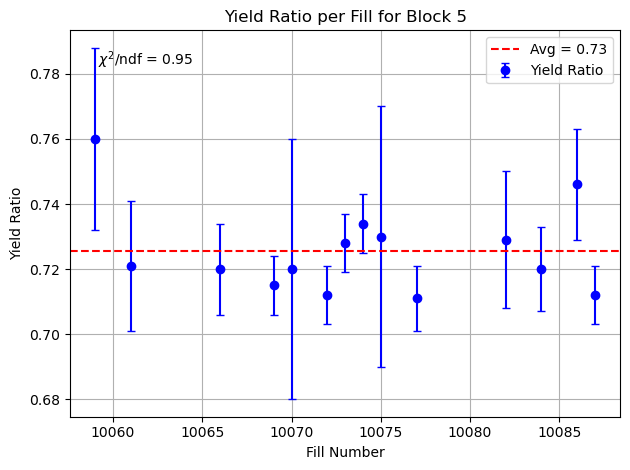

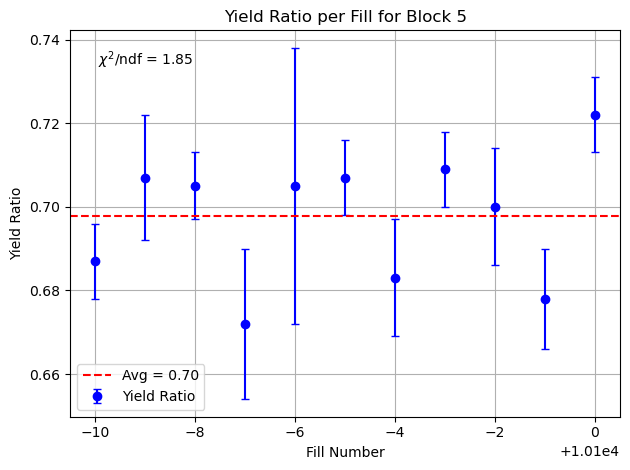

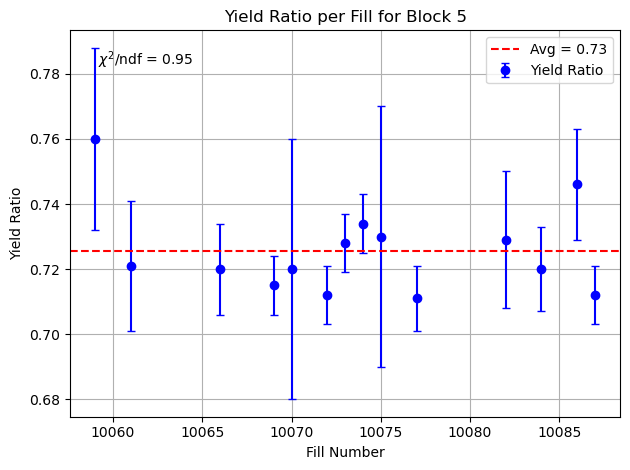

In [5]:
for yield_ratio_B5 in [yield_ratio_B5_A, yield_ratio_B5_B, yield_ratio_B5]:    
    # Separate into x (fill), y (mean), and yerr (stddev)
    fills = [entry[0] for entry in yield_ratio_B5]
    means = [entry[1] for entry in yield_ratio_B5]
    errors = [entry[2] for entry in yield_ratio_B5]

    # Compute zero-order fit (average)
    mean_average = np.mean(means)

    # Compute chi-square and ndf
    chi2 = sum(((y - mean_average) / err) ** 2 for y, err in zip(means, errors))
    ndf = len(means) - 1
    chi2_ndf = chi2 / ndf if ndf > 0 else 0

    # Plot
    plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Yield Ratio')
    plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

    # Add chi-square/ndf label
    plt.text(
        0.05, 0.95,
        f"$\\chi^2$/ndf = {chi2_ndf:.2f}",
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment='top'
    )

    # Labels and layout
    plt.xlabel("Fill Number")
    plt.ylabel("Yield Ratio")
    plt.title("Yield Ratio per Fill for Block 5")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

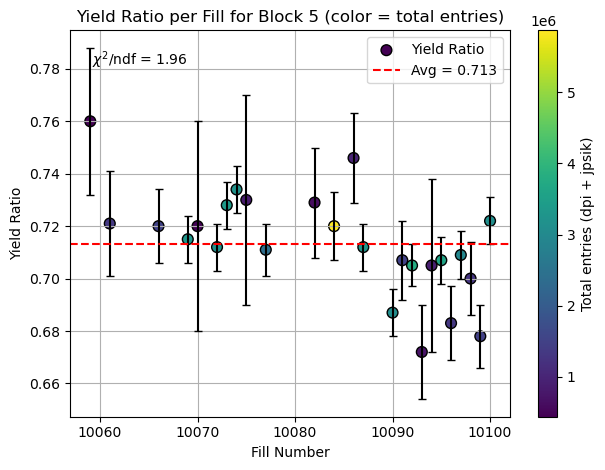

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Extract data
fills = [entry[0] for entry in yield_ratio_B5]
means = [entry[1] for entry in yield_ratio_B5]
errors = [entry[2] for entry in yield_ratio_B5]
totals = [entry[3] + entry[4] for entry in yield_ratio_B5]  # color weight

# Compute weighted average (optional, you can use plain average instead)
mean_average = np.mean(means)

# Compute chi-square and ndf
chi2 = sum(((y - mean_average) / err) ** 2 for y, err in zip(means, errors))
ndf = len(means) - 1
chi2_ndf = chi2 / ndf if ndf > 0 else 0

# Plot with color coded by total entries
sc = plt.scatter(fills, means, c=totals, cmap="viridis", s=60, edgecolor="k", label="Yield Ratio")
plt.errorbar(fills, means, yerr=errors, fmt='none', ecolor='black', capsize=3)

# Add average line
plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.3f}')

# Add chi-square/ndf label
plt.text(
    0.05, 0.95,
    f"$\\chi^2$/ndf = {chi2_ndf:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top'
)

# Labels and layout
plt.xlabel("Fill Number")
plt.ylabel("Yield Ratio")
plt.title("Yield Ratio per Fill for Block 5 (color = total entries)")
plt.colorbar(sc, label="Total entries (dpi + jpsik)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
